In [48]:
import matplotlib.pyplot as plt


{'mattRushAi(AStarPathFinding)', 'WorkerRush2(BFSPathFinding)', 'newAI(BFSPathFinding)'}
38
114


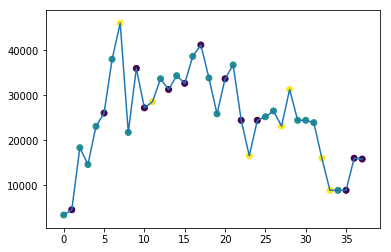

In [54]:
depths = []
decisions = []
scores = []
with open('logs.txt') as file:
    for data in file:
        if ' v ' in data:
            depths.append(int(data.split(':')[1]))
        elif 'with score of' in data:
            decisions.append(data.split(' ')[1])
            scores.append(float(data.split(': ')[2]))

print(set(decisions))
print(len(scores))
print(len(depths))
colourDict = {}
j = 0
for i in set(decisions):
    colourDict[i] = j
    
    j += 1

colours = []
for i in decisions:
    colours.append(colourDict[i])

plt.plot(scores)
plt.scatter(range(len(scores)),scores,c=colours)



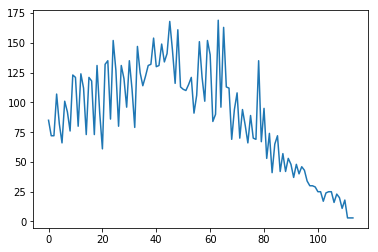

In [41]:
plt.plot(depths)